In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.
    test_images = test_images / 255.
    
    return (train_images, test_images)

In [4]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [5]:
# Add a Dummy Channel Dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [6]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    history = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3,3), padding='SAME', activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return history

In [10]:
model = get_model(scaled_train_images[0].shape)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(scaled_train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0320 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9940


In [17]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

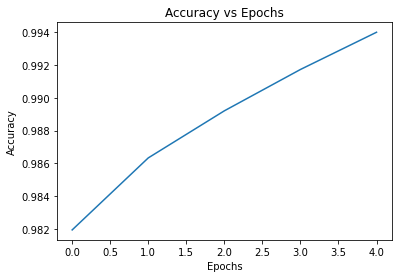

In [18]:
acc_plot = frame.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

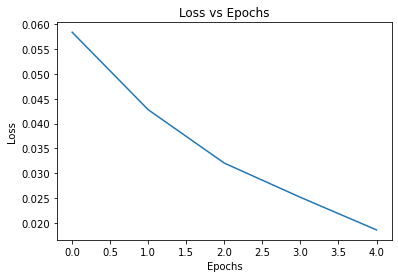

In [19]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [20]:
model.evaluate(scaled_test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9839


[0.0535421259701252, 0.9839000105857849]

In [21]:
num_test_images = scaled_test_images.shape[0]

In [24]:
random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx,...]
random_test_labels = test_labels[random_inx,...]

predictions = model.predict(random_test_images)

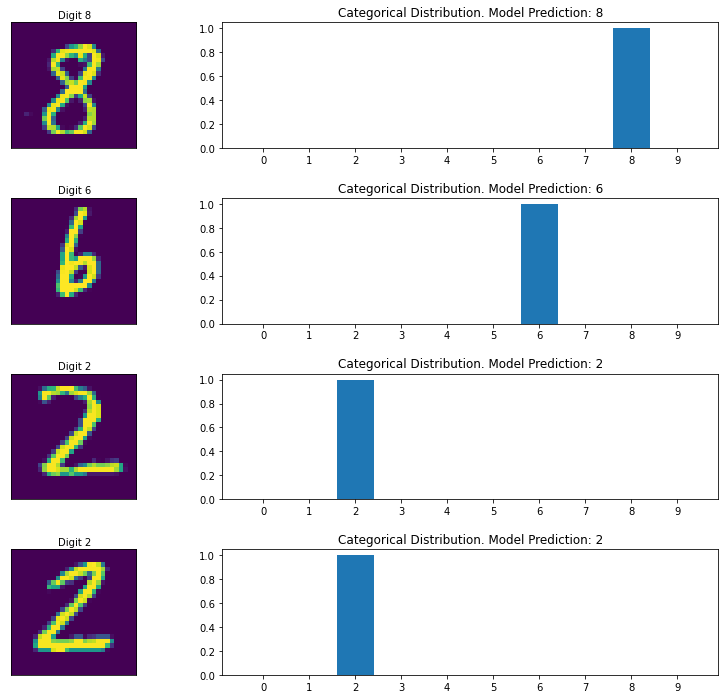

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10.,-1.5,f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f'Categorical Distribution. Model Prediction: {np.argmax(prediction)}')
    
plt.show()    